# Comparing Chinese Text
In this notebook, I compared nine Chinese fiction of three authors (Please see the following code). The key idea is to consider the nine fictions as nine [bags of words](https://en.wikipedia.org/wiki/Bag-of-words_model) (ignore the order of word), and compare the nine fictions throught the keywords used in each fiction. 

In [12]:
import os
import numpy as np
import sklearn.feature_extraction.text as text

data_dir = 'Fictions/'

filenames = np.array(sorted(os.listdir(data_dir)))

filenames_with_path = [os.path.join(data_dir, fn) for fn in filenames] # join the path with filenames

In [16]:
filenames_with_path[-9:]

['Fictions/JiaPingwa_happyDreams.txt',
 'Fictions/JiaPingwa_oldFurnace.txt',
 'Fictions/JiaPingwa_ruinedCity.txt',
 'Fictions/MoYan_Frog.txt',
 'Fictions/MoYan_bigBreast&wideHips.txt',
 'Fictions/MoYan_redSorghum.txt',
 'Fictions/WangShuo_dangerousAnimals.txt',
 'Fictions/WangShuo_stewardess.txt',
 'Fictions/WangShuo_theTroubleShooter.txt']

## Creating a document-term matrix
- A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 
- In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. 
- The purpose is that reducing a book to a list of word frequencies retains useful information. This is based on the idea "bag of word".

In [53]:
vectorizer = text.CountVectorizer(input='filename')
dtm = vectorizer.fit_transform(filenames_with_path[-9:])

In [56]:
# Now we use the TfidfVectorizer class to create a document-term matrix.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input='filename')
dtm = vectorizer.fit_transform(filenames_with_path[-9:])

In [57]:

vocab = np.array(vectorizer.get_feature_names())
# print the vocabulary in the bag
vocab

array(['0k', '10', '101', ..., 'ｗｗｗ', 'ｘt', 'ｘ年ｘ月ｘ日于日书摊'], dtype='<U108')

In [58]:
# sum over rows to calculate lengths(the numbers in a row are word frequency of a document,so sum the numbers to get the word count of each document)
lengths = np.sum(dtm, axis=1)
print (lengths)


[[ 44.90131178]
 [ 38.16240395]
 [ 46.37777752]
 [ 71.07047327]
 [156.66807132]
 [ 64.62463298]
 [ 66.23507285]
 [ 54.99439158]
 [ 53.82426738]]


## Comparing text
Arranging our texts in a document-term matrix make it available for calculating a measure of similarity between texts. Since each row of the document-term matrix is a sequence of a novel’s word frequencies, it is possible to put mathematical notions of similarity (or distance) between sequences of numbers in service of calculating the similarity (or distnace) between any two novels. 

### Measure of distance

#### Multidimensional scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space. (Dimensionality reduction)

#### Cosine similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. It is thus a judgment of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1, two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude.
Here we vectorized the term in each fiction to apply Cosine similarity to culculate the similarity between the term vectors. 

In [65]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

Keep in mind that cosine similarity is a measure of similarity (rather than distance) that ranges between 0 and 1 (as it is the cosine of the angle between the two vectors). In order to get a measure of distance (or dissimilarity), we need to “flip” the measure so that a larger angle receives a larger value. The distance measure derived from cosine similarity is therefore one minus the cosine similarity between two vectors.

In [66]:
dist = 1 - cosine_similarity(dtm)
np.round(dist, 2)

array([[-0.  ,  0.98,  0.99,  0.86,  0.93,  1.  ,  0.99,  0.96,  1.  ],
       [ 0.98,  0.  ,  1.  ,  0.99,  0.99,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 0.99,  1.  ,  0.  ,  1.  ,  0.99,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 0.86,  0.99,  1.  ,  0.  ,  0.91,  0.98,  0.99,  0.98,  1.  ],
       [ 0.93,  0.99,  0.99,  0.91, -0.  ,  0.97,  0.99,  0.98,  0.99],
       [ 1.  ,  1.  ,  1.  ,  0.98,  0.97, -0.  ,  1.  ,  0.99,  1.  ],
       [ 0.99,  1.  ,  1.  ,  0.99,  0.99,  1.  ,  0.  ,  0.99,  0.99],
       [ 0.96,  1.  ,  1.  ,  0.98,  0.98,  0.99,  0.99,  0.  ,  0.99],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  0.99,  1.  ,  0.99,  0.99,  0.  ]])

In [67]:
# lets take a look at the distance between "MoYan_Frog" and "WangShuo_theTroubleShooter"
dist[3, 8]

0.996187662073865

In [69]:
# distance between "MoYan_Frog" and "JiaPingwa_happyDreams"
dist[0, 3]

0.8577077820345105

Distance (0.996187662073865) between "MoYan_Frog" and "WangShuo_theTroubleShooter" is larger than distance (0.8577077820345105) between "MoYan_Frog" and "JiaPingwa_happyDreams"

### Visualizing Distance
It is often desirable to visualize the pairwise distances between our texts. A general approach to visualizing distances is to assign a point in a plane to each text, making sure that the distance between points is proportional to the pairwise distances we calculated. This kind of visualization is common enough that it has a name, “multidimensional scaling” (MDS) and family of functions in scikit-learn.

In [47]:
# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)


In [48]:
# create very short names for plotting
# filenames have form: JiaPingwa_ruinedCity.txt
authors = [] 
names = []
for fn in filenames[-9:]:
    author = fn.split('_')[0]
    authors.append(author)
    names.append(fn)

In [49]:
# Visualize distances
import matplotlib.pyplot as plt

xs, ys = pos[:, 0], pos[:, 1]
authors_unique = sorted(set(authors)) # get unique authors
print (authors_unique)

['JiaPingwa', 'MoYan', 'WangShuo']


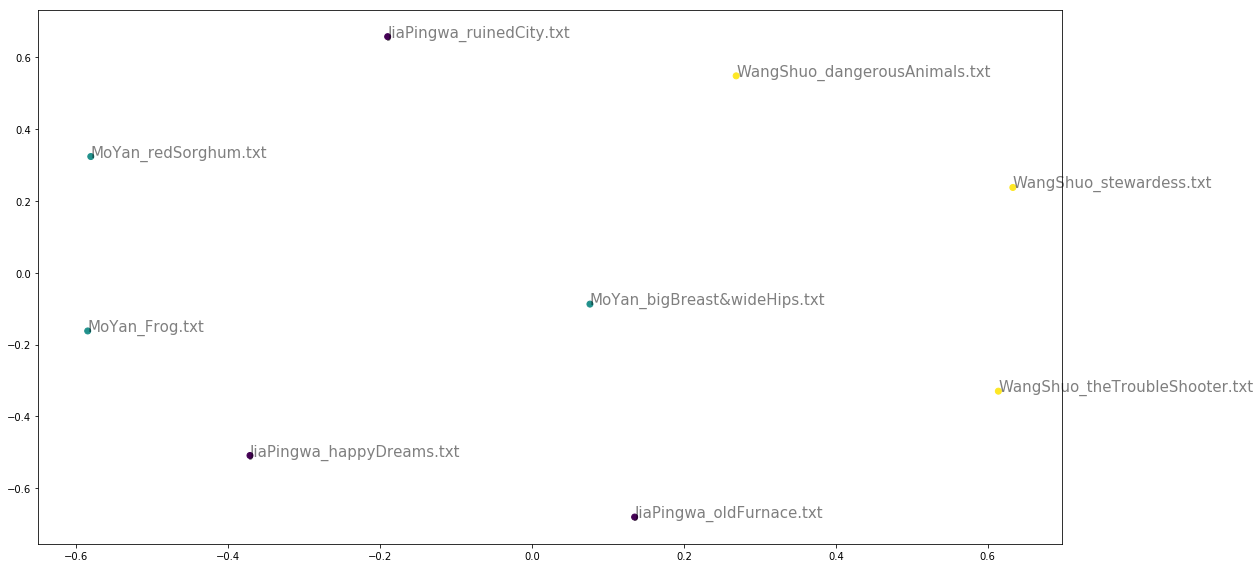

In [50]:

colors = [authors_unique.index(a) for a in authors] # get a unique color for texts of each author  
plt.figure(figsize=(15, 8)) 
plt.scatter(xs, ys,c=colors,cmap='viridis')

for x, y, name in zip(xs, ys, names):
    plt.text(x, y, name, alpha=0.5, fontsize=15)
plt.tight_layout()
plt.show()

From the figure above, we can see that Wangshuo's fictions (yellow spots) are tend to be clustered as a group. While the distance between Wangshuo's and Moyan's RedSorghum and Frog are large. Wangshuo's preference on using Beijing dialect in his works may also be a reason for its being easily distinguished from other works.